# 7.2 Kernel methods in practice
In the current exercise, we will apply the concepts learned about kernel-methods using 4 toy datasets : moons, circles, blobs, and swiss roll. 

__Task__: Using the kernels available in the support vector machine (SVM) implementation found in scikit learn (linear, polynomial, Gaussian, or sigmoid), find the kernel and the corresponding parameter for which SVM achieves the best classification performance. Specifically, experiment with the value of the $\gamma$ parameter, which controls the influence of each of the training samples in the kernel-projection, and therefore, the bias introduced by the kernel used. For further information, see the [scikit learning documentation](http://scikit-learn.org/stable/modules/svm.html#kernel-functions) about the kernels used. Leave the other parameters, as the regularization strength $C$ and the degree of the polynomial kernel fixed.

__Hint 1__: Implement a grid search to find the optimal $\gamma$ value for each of the kernels.

__Hint 2__: Don't forget to use an adequate crossvalidation framework to avoid overfitting.

__Q 7.2.1__ For each of the datasets, what is the kernel with which SVM achieves the best classification performance? What is the corresponding $\gamma$ value?

__Task__: For each of the kernels studied above, find the corresponding K-PCA projection using the same kernel parameters. Visualize the achieved projection and compare the result with projects resulting from using different $\gamma$ values.

__Q 7.2.2__ For each of the datasets, what is the kernel with which the data has the best separability (visual inspection)? What is the corresponding $\gamma$ value? Does the kernel and the $\gamma$ values correspond to the ones for which the performance on __Q 7.2.1__ was the highest?

__Q 7.2.3__ How many components yield K-PCA? How and why is it different from the number of components delivered by PCA?

__BONUS__: Scikit learn provides a method to automatically perform a grid search and find the optimal parameters for a given kernel when training a SVM. Find and use the mentioned method to find the optimal set of parameters for each of the Kernels and datasets. Are the $\gamma$ values the you found for __Q 7.2.1__  and __Q 7.2.2__  similar to the ones yield by the automatic grid search function provided by scikit learn?

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

from sklearn import datasets
from sklearn import cross_validation
from sklearn.preprocessing import normalize
from sklearn.decomposition import KernelPCA
from sklearn import svm

from jupyterthemes import jtplot
jtplot.style('onedork')

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def scatter_plotDataset(fig,x,y):
    colors = ['r','b']   
    if x.shape[1] == 2: # Check 2D or 3D data
        ax = fig.add_subplot(111)
        for idx_class in range(2):
            ax.scatter(x[y==idx_class,0],x[y==idx_class,1],
                     c=colors[idx_class])
    elif x.shape[1] == 3:        
        ax = fig.add_subplot(111, projection='3d')
        for idx_class in range(2):
            cclass = y==idx_class
            ax.scatter(x[cclass,0],x[cclass,1],x[cclass,2],
                     c=colors[idx_class])
            ax.set_zlabel('feat. 3')
    ax.set_xlabel('feat. 1')
    ax.set_ylabel('feat. 2')
    return ax

### Load and plot data

/home/svilches/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


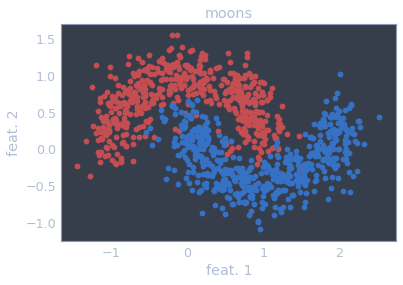

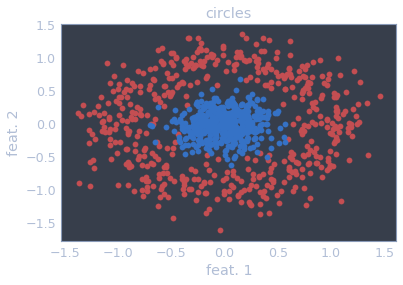

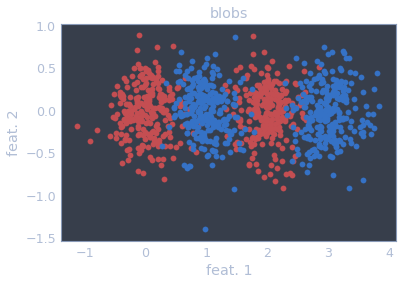

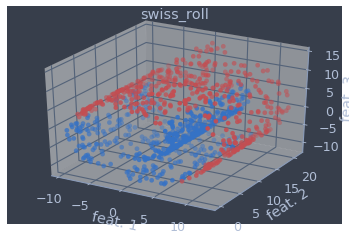

In [3]:
datasets = {'moons': [],
           'circles': [],
           'blobs': [],
           'swiss_roll': [],}
for key, value in datasets.items():
    fname = os.path.join('datasets',key+'.data')
    x = np.loadtxt(fname)
    fname = os.path.join('datasets',key+'.labels')
    y = np.loadtxt(fname)
    fig = plt.figure()
    plt.grid()
    ax = scatter_plotDataset(fig,x,y)
    ax.set_title(key)   

### Testing SVM

/home/svilches/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


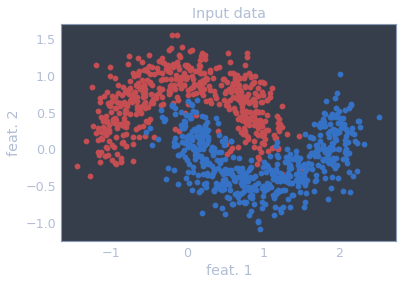

In [4]:
x = np.loadtxt("datasets/moons.data")
y = np.loadtxt("datasets/moons.labels")
fig = plt.figure();
plt.grid();
ax = scatter_plotDataset(fig,x,y);
ax.set_title("Input data");

##### Testing the effect of gamma in the number of support vectors

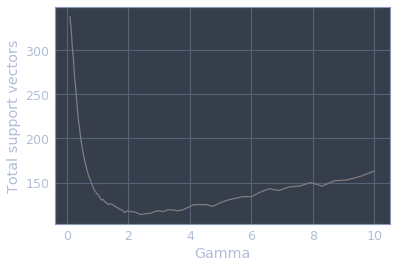

In [53]:
gammas=np.logspace(-1,1,num=100)
nSupports=[]
for g in gammas:
    clf=svm.SVC(gamma=g,C=1);
    clf.fit(x, y);
    nSupports.append(np.sum(clf.n_support_))
plt.plot(gammas,nSupports,c='gray');
plt.xlabel('Gamma'); plt.ylabel('Total support vectors');

## Testing SVM

In [82]:
# Split the data in train/test set
rTrain=0.5; # ratio of data used for training
nTest=int(y.size*(1-rTrain))
x_train=x[:-nTest,:]
y_train=y[:-nTest]
x_test=x[-nTest:,:]
y_test=y[-nTest:]

# Train SVM
clf=svm.SVC(kernel='rbf',gamma=2,C=1); # Increased C = more complexity
clf.fit(x_train, y_train);
#Test with new data
y_prediction=clf.predict(x_test)
print('The Accuracy on the test set is %.2f%%' %(sum(y_test==y_prediction)/len(y_test)*100))

The Accuracy on the test set is 97.60%


# k-PCA

Text(0,0.5,'2nd component')

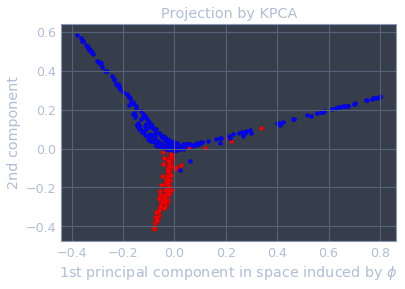

In [105]:
kpca = KernelPCA(
    kernel="rbf", # Radial basis function
    fit_inverse_transform=True, # Learn the inverse transform for non-precomputed kernels. (i.e. learn to find the pre-image of a point)
    gamma=20)

X_kpca=kpca.fit_transform(x_train)
X_kpca=kpca.fit_transform(x_test)

reds = y_test == 0
blues = y_test == 1
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")